# 구로구 사장님들 주목하세요!

# 들어가며

  최근 들어 코로나가 장기화되고, 확진자 수도 가파르게 증가하고 있습니다. 코로나는 우리의 많은 일상을 바꾸었습니다. 그 중 단연 큰 변화는 식문화입니다. 사회적 거리두기, 5인 이상 집합 금지 등이 장기화 되면서 배달 산업은 매우 성장하고 있습니다. 이제 배달 서비스는 거부할 수 없는 흐름입니다. 이에 적응하지 못한 가게들은 힘든 시기를 겪고 있습니다. 반면 이러한 위기를 기회로 바꾸어 성공하는 가게 또한 있습니다. 저희는 다양한 요인 중 <b> 상권 분석 </b>을 주요한 요인으로 선정하였습니다.

# 목차 
## 서론 : 코로나-19와 한국
- 한국의 코로나-19 현황
- 코로나-19로 인한 배달산업의 변화

## 본론 
### 1. 구로구 배달산업 분석
- 월/일/날짜별 배달 건수 및 매출액 분석
- 업종별 배달 건수 및 매출액 분석
- 배달 소요시간 및 거리

### 2. 구로구 상권 분석
- 생활인구 시각화
- 주변 경쟁업체 배달 건수 및 매출액 분석

## 결론
- 최적의 상권 후보 도출

## 마치며

# 서론  : 코로나-19와 한국

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib.pyplot import *
from matplotlib import animation
from matplotlib import cm

import plotly.offline as py
py.init_notebook_mode(connected = True)
#import chart_studio.plotly as py
import cufflinks as cf
%config InlineBackend.figure_format = 'retina'
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px
# plotly 시각화
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

from sklearn.cluster import KMeans
from dateutil import parser
import io
import base64
from IPython.display import HTML

### 한국의 코로나-19 현황

In [2]:
# 코로나 감연 현황(전국) 데이터 불러오기
corona = pd.read_csv('data/covid_19_dataset/PatientInfo.csv')

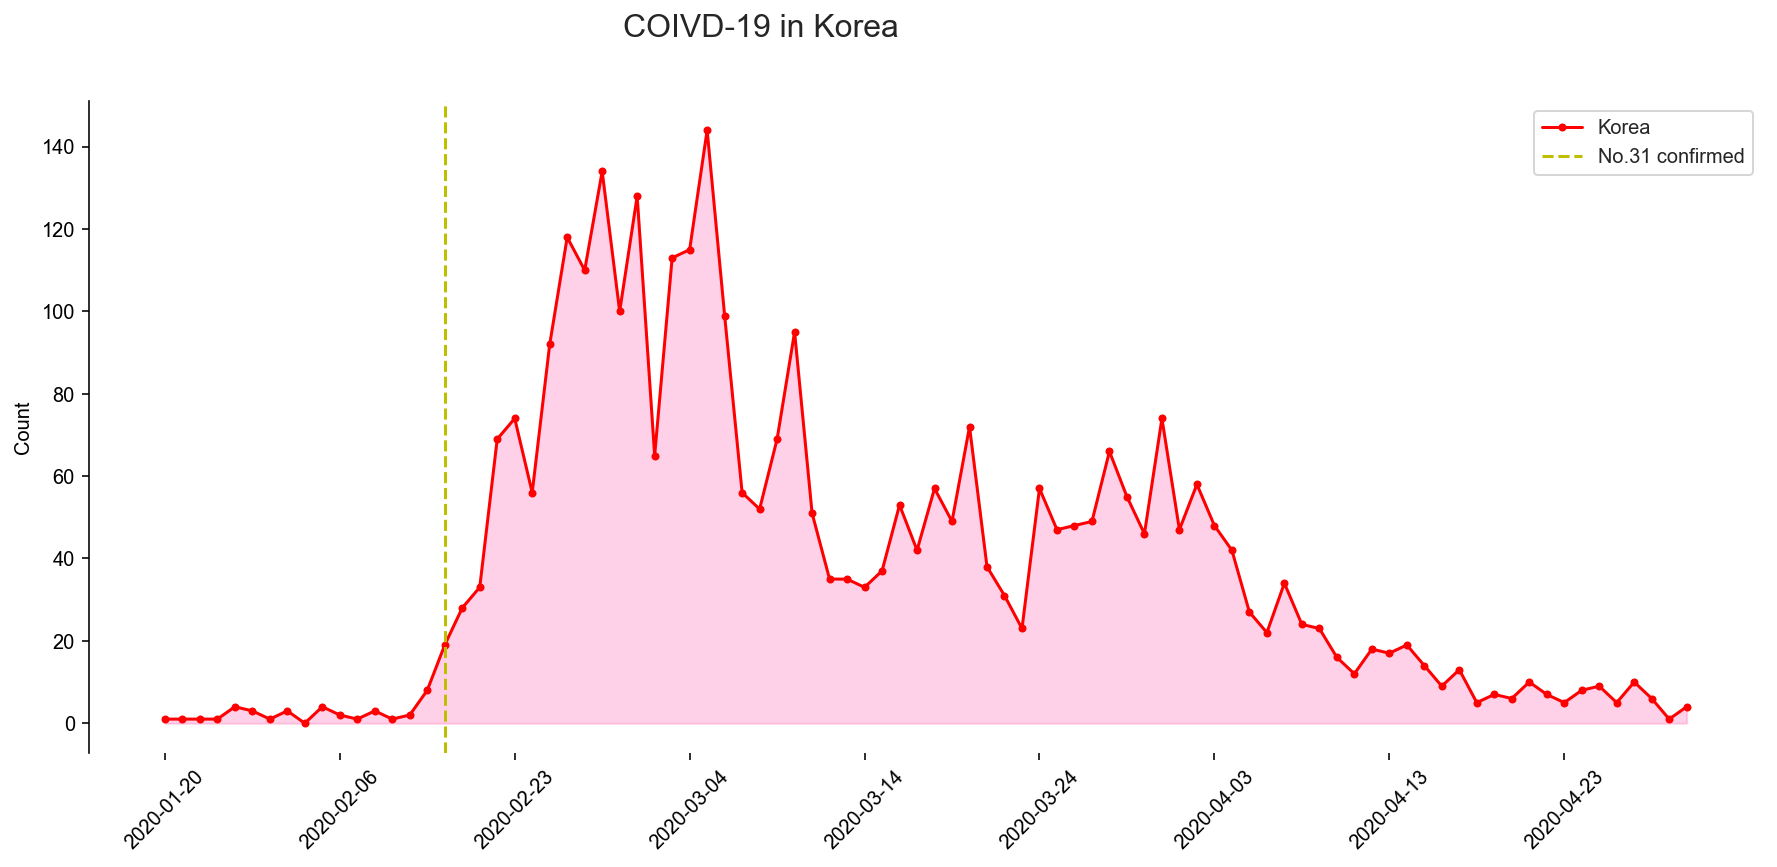

In [3]:
dim = 'confirmed_date'

# 전국
corona_cnt = pd.DataFrame(corona.groupby(dim)[['city']].count().to_records())

# 한국 코로나 19 확진자 추이 시각화
fig, ax = plt.subplots(figsize = (15,6))
x1 = corona_cnt.iloc[:88].confirmed_date
y1 = corona_cnt.iloc[:88].city

sns.set_style('white')

ax.plot(x1,y1, label = 'Korea', color = 'r', marker = '.')
plt.fill_between(x1, y1, color = 'hotpink', alpha = .3)
plt.axvline(x = '2020-02-19', color = 'y', linestyle = '--', label = 'No.31 confirmed')
ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation = 45)
plt.suptitle("COIVD-19 in Korea", size = 16, ha = 'right')
plt.ylabel('Count')
plt.legend()
sns.despine(top = True, bottom = True)
plt.show()

2020년 1월 20일, 국내 코로나-19 확진자가 처음 나왔습니다. 2월 경의 대구 신천지 교회 집단감염 이후로 코로나-19 확진자가 증가하는 것을 확인할 수 있습니다.

In [4]:
# 서울/경기를 포함한 수도권 코로나-19 확진자 수
capital_corona = corona.loc[(corona['province'] == 'Seoul') | (corona['province'] == 'Gyeonggi-do')].reset_index(drop = True)
corona_cnt_capital= pd.DataFrame(capital_corona.groupby(dim)[['city']].count().to_records())

# 구로구 코로나-19 확진자 수
guro_corona = capital_corona[capital_corona['city'] == 'Guro-gu'].reset_index(drop = True)
corona_cnt_guro = pd.DataFrame(guro_corona.groupby(dim)[['city']].count().to_records())

# 경북/대구의 코로나-19 확진자 수
gyungbook_corona = corona.loc[(corona['province'] == 'Gyeongsangbuk-do') | (corona['province'] == 'Daegu')]
corona_cnt_gyungbook = pd.DataFrame(gyungbook_corona.groupby(dim)[['city']].count().to_records())

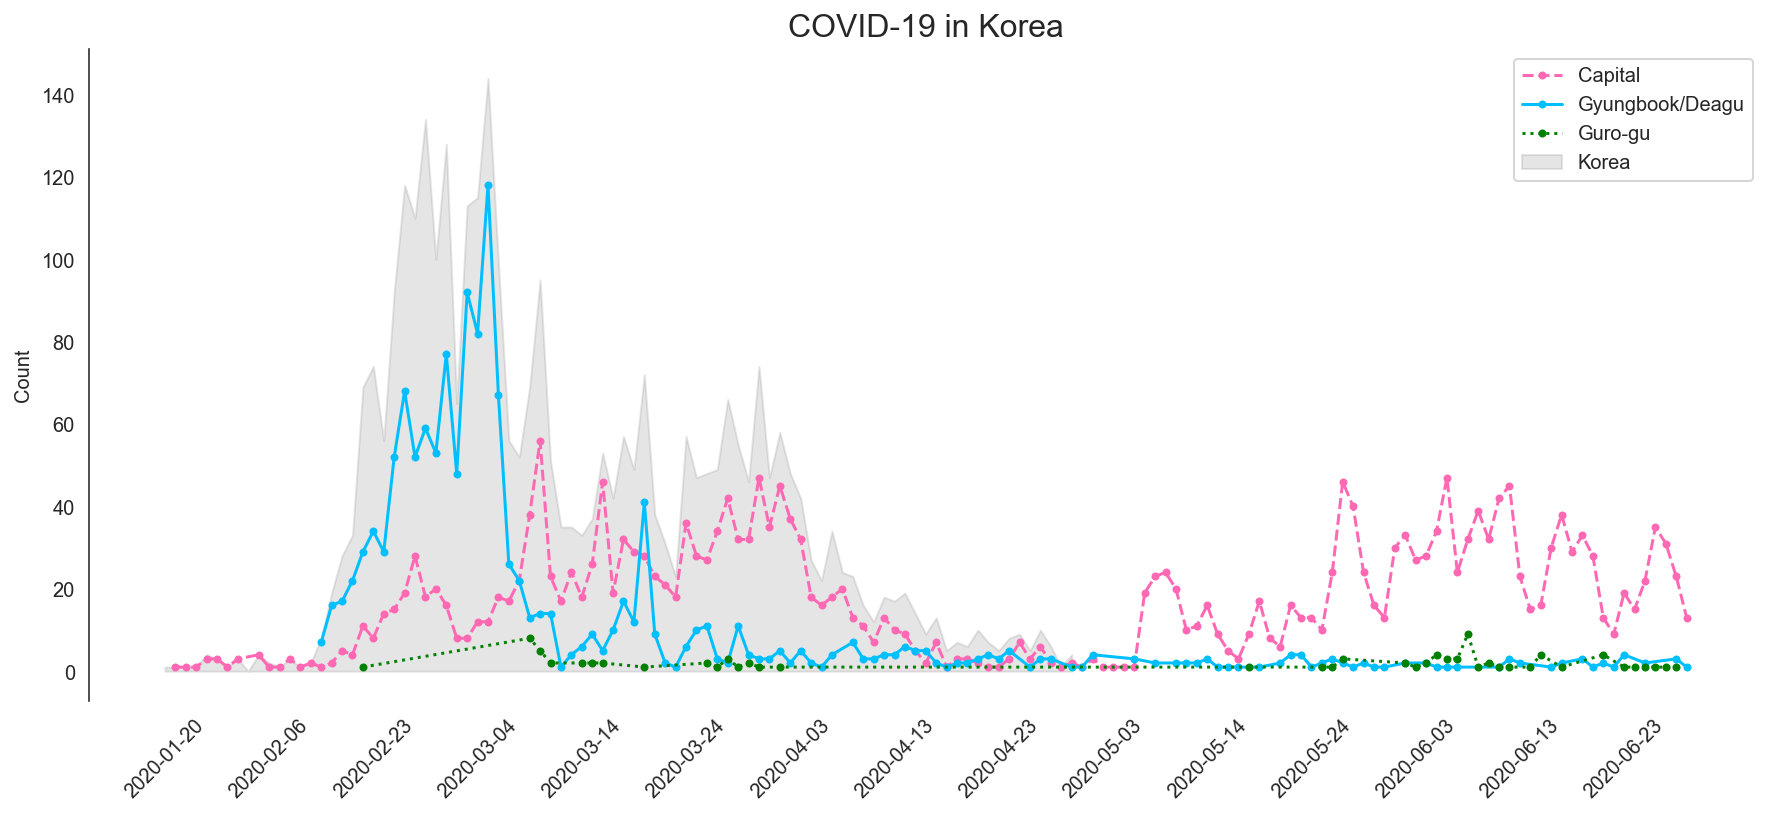

In [5]:
# 한국 코로나 19 확진자 추이 시각화
fig, ax = plt.subplots(figsize = (15,6))

x2 = corona_cnt_capital.confirmed_date
y2 = corona_cnt_capital.city

x3 = corona_cnt_gyungbook.confirmed_date
y3 = corona_cnt_gyungbook.city

x4 = corona_cnt_guro.confirmed_date
y4 = corona_cnt_guro.city

plt.fill_between(x1, y1, color = 'gray', alpha = .2, label = 'Korea')
ax.plot(x2, y2, color = 'hotpink', label = 'Capital', linestyle = '--', marker = '.')
ax.plot(x3, y3, color = 'deepskyblue', label = 'Gyungbook/Deagu', linestyle ='-', marker = '.')
ax.plot(x4, y4, color = 'green', label = 'Guro-gu', linestyle = ':', marker = '.')
ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation = 45)
plt.title("COVID-19 in Korea", size = 16)
plt.ylabel('Count')
plt.legend()
sns.despine(top = True, bottom = True)
plt.show()

2월경에 대구 신천지 집단 감염 이후로, 경북/대구 지역의 확진자가 급속도로 증가하였습니다. 그에 따른 파급 효과로 서울/경기 지방의 코로나-19 확진자 수도 증가하는 것을 확인 할 수 있습니다. 

5월경에는 경북/대구 지역 코로나-19 확진자는 소강 상태로 보입니다. 반면 이태원 클럽 집단 감염으로 인해 서울/경기 지방의 코로나-19 확진자 수는 재증가하고 있습니다.

### 코로나-19 감염경로

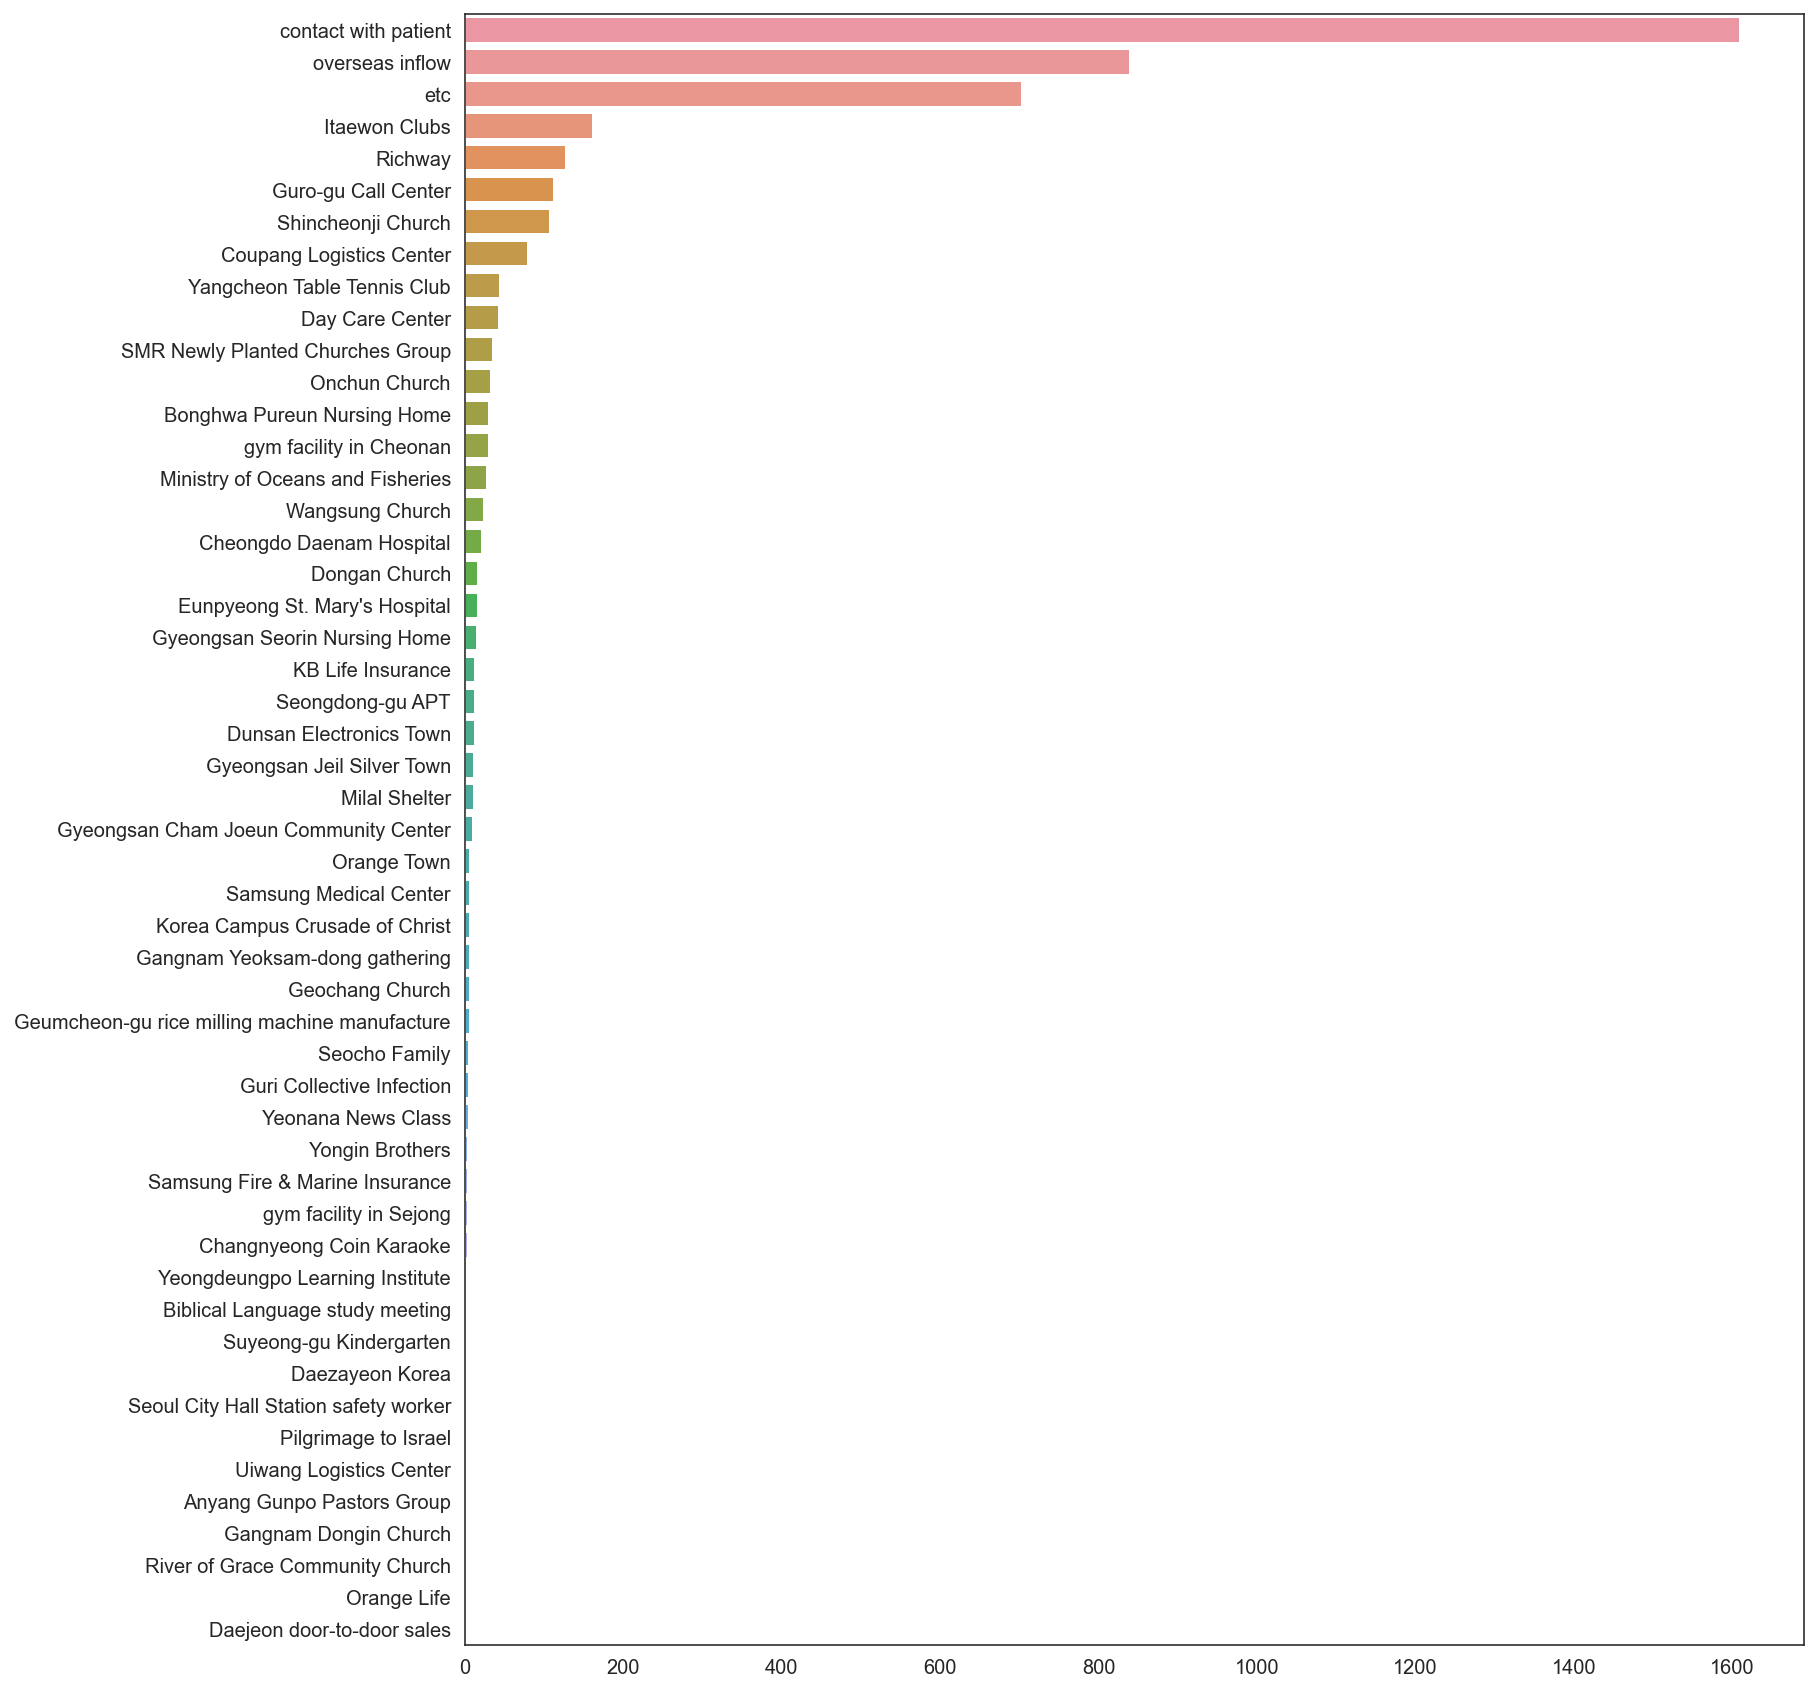

In [6]:
# 코로나-19 감염경로
corona_infection = corona['infection_case'].value_counts().sort_values(ascending = False)

# 시각화
plt.figure(figsize = (12,15))
sns.barplot(x = corona_infection.values, y = corona_infection.index)
plt.show()

코로나-19의 주요 감염 경로는 바이러스가 들어있는 비말이나 작은 입자를 내뿜는 감염자 가까이에서 공기를 들이마실 때, 바이러스가 묻은 손으로 눈, 코, 입을 만질 때입니다. 위 그래프에서도 확인할 수 있듯 타인과의 접촉으로 인해 감염됩니다. 이러한 특수성 때문에 비대면 배달산업이 성장하게 되었습니다.

### 코로나-19로 인한 배달 산업의 변화

코로나-19의 영향으로‘사회적 거리 두기’운동이 장기화 됨에 따라 비대면 소비가 일상화되면서  배달의 민족, 요기요, 마켓 컬리와 같은 비대면 문화가 새로운 패러다임으로 등장했습니다. 

In [7]:
# 데이터 불러오기
df = pd.read_csv('data/KT_빅데이터플랫폼_데이터셋/dlvr_call.csv')

In [8]:
# datetime 형식으로 변경
df['PROCESS_DT'] = pd.to_datetime(df['PROCESS_DT'])

# 인덱스를 시간으로 지정
df.index = df['PROCESS_DT']

# 일주일 단위로 count 세줌
df_count = df.resample('D')['SN'].count()

# 데이터프레임으로 만듦
df_count = pd.DataFrame(df_count)

In [9]:
df_count.iplot(kind='line',xTitle='Datetimes',yTitle='Demand',title='코로나-19 확산 전후 배달건수', color = 'red')

국내 첫 확진자는 1월 20일에 발생하였습니다. 해당 주에는 배달건수가 감소하였지만 국내의 코로나-19 확진자가 급격히 늘어났던 2,3월에는 높은 배달건수를 보였습니다. 

5월 18일에는 데이터가 기록되지 않은 것으로 보입니다.

In [10]:
# 일주일 단위로 count 세줌
df_sum = df.resample('D')['GOODS_AMOUNT'].sum()

# 데이터프레임으로 만듦
df_sum = pd.DataFrame(df_sum)

In [11]:
df_sum.iplot(kind='line',xTitle='Datetimes',yTitle='Demand',title='코로나-19 확산 전후 배달 매출액', color = 'darkblue')

배달 매출액 또한 배달건수와 유사한 패턴을 보입니다.

In [12]:
df_count = df.resample('M')['DLVR_STORE_INDUTY_NM'].value_counts()
df_count =pd.DataFrame(df_count)
df_count = df_count.unstack()

In [13]:
Comp_trace = []
name = ['도시락', '돈까스/일식', '배달전문업체', '분식', '아시안/양식', '야식', '족발/보쌈', '중식', '찜탕', '치킨', '카페/디저트', '패스트푸드', '피자', '한식', '회']

for i in range(len(name)):
    trace = go.Bar(
        x = df_count.index, 
        y = df_count['DLVR_STORE_INDUTY_NM'][name[i]].values, 
        name = str(name[i]))
    Comp_trace.append(trace)
    
data = Comp_trace

layout = go.Layout(
    barmode = 'stack',
    title = '월별 배달 음식 선호도 그래프', 
    xaxis=dict(title='Date'))

fig = go.Figure(data = data, layout=layout)
py.iplot(fig)

* 주의 : x축에 해당하는 월 전날까지의 합계입니다!

코로나-19로 인해 오프라인 매장을 이용하기 힘들어짐에  따라 배달을 통해 식사하는 경우가 많아졌습니다. 위 그래프를 통해 배달과는 거리가 멀었던 한식 시장이 계속 성장하는 것을 확인 할 수 있습니다. 이러한 흐름은 코로나-19가 끝난 후에도 정착 될 것으로 예상됩니다.

# 본론

### 구로구에 대해서

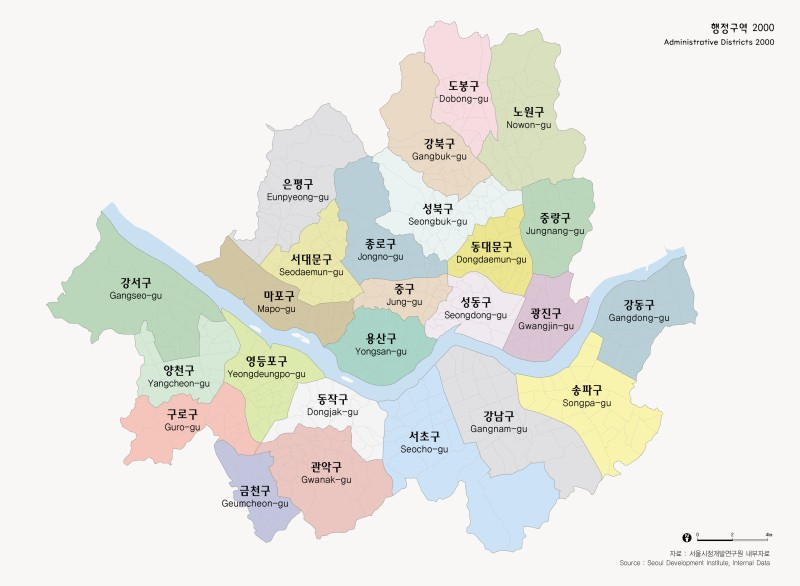

저희는 서울 지역에서 데이터 수가 가장 많이 기록되어 있고,  한 팀원의 부모님께서도 구로구에서 자영업을 하시기 때문에 구로구를 중심으로 분석하려고 합니다. 구로구는 서울의 강서쪽에 위치해있으며, 북쪽으로는 양천구, 동쪽으로는 동작구, 영등포구, 관악구, 서쪽으로는 경기도 부천시, 남쪽으로는 금천구, 경기도 광명시와 접해있습니다.

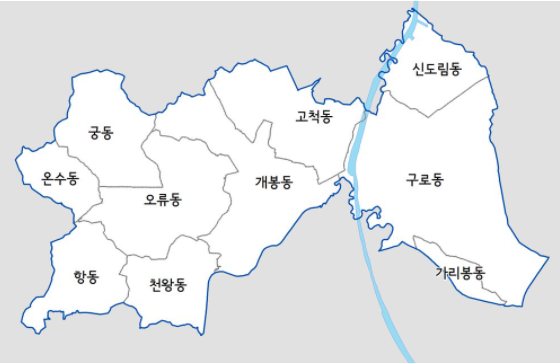

구로구 10개의 법정동 지역은 위 그림과 같습니다.

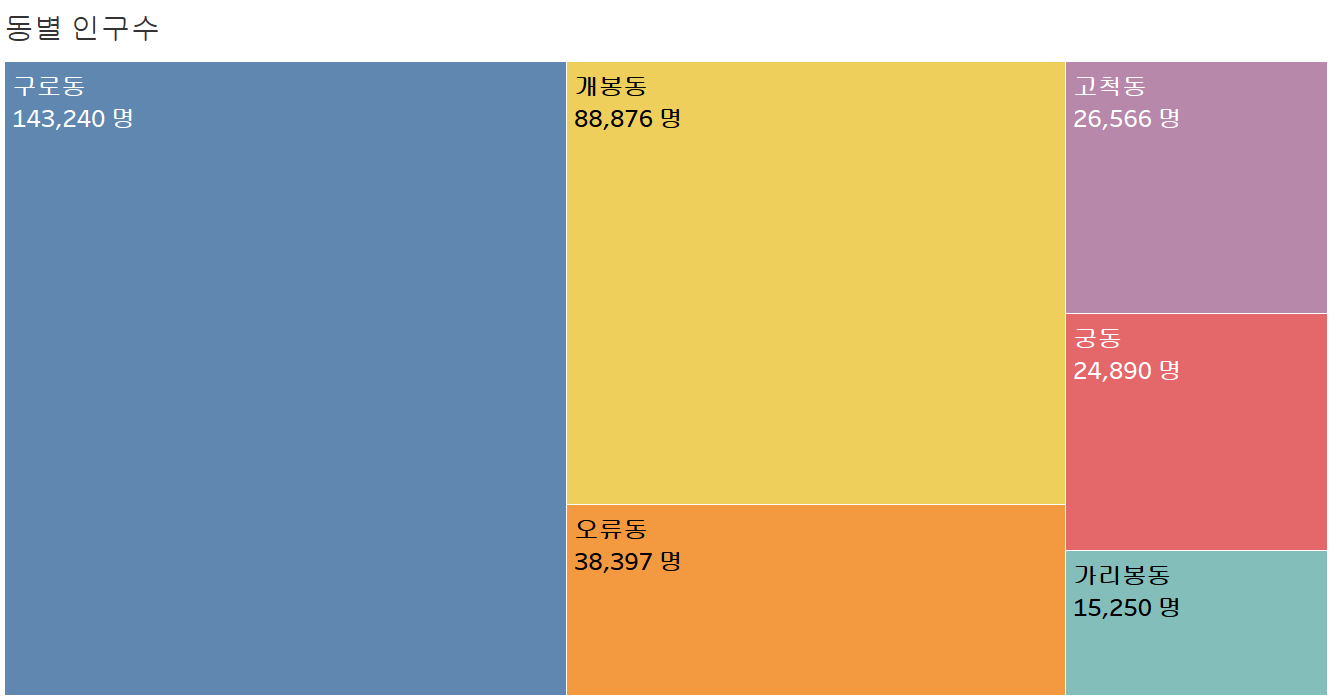

위 그림은 태블로로 그린 구로구 동별 인구 수 입니다. 등록인구는 구로동이 143,240명, 개봉동이 88,876명이고 나머지 동은 1.5~4만명 사이입니다.

   ## 1. 구로구 배달산업 분석

In [14]:
guro = pd.read_csv('data/구로구 데이터(전처리 완료).csv')
guro_copy = guro.copy()
print(guro.shape)
guro.head()

(291500, 38)


,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,...,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,DLVR_STORE_ROAD,DLVR_DSTN_ROAD,DLVR_STORE_LAT,DLVR_STORE_LONG,DLVR_DSTN_LAT,DLVR_DSTN_LONG
0,3486946,2019-12-01,C000049,1,C000049,S0022458,패스트푸드,1153010800,서울특별시,구로구,...,2019-12-01 20:37:16,2019-12-01 20:44:49,2019-12-01 21:04:42,\N,서울특별시 구로구 경인로20길,서울특별시 구로구 오리로22나길,37.495331,126.845316,37.499759,126.831167
1,3486960,2019-12-01,C000049,1,C000049,S0022440,패스트푸드,1153010600,서울특별시,구로구,...,2019-12-01 22:40:24,2019-12-01 22:49:55,2019-12-01 22:55:59,\N,서울특별시 구로구 경인로47길,서울특별시 구로구 고척로52길,37.502084,126.865063,37.502174,126.855920
2,3486964,2019-12-01,C000049,1,C000049,S0000200,분식,1153010600,서울특별시,구로구,...,2019-12-01 19:12:08,2019-12-01 19:22:07,2019-12-01 19:43:26,\N,서울특별시 구로구 경인로47길,서울특별시 구로구 구일로10길,37.502084,126.865063,37.495828,126.874795
3,3486978,2019-12-01,C000049,1,C000049,S0000267,회,1153010600,서울특별시,구로구,...,2019-12-01 19:52:00,2019-12-01 19:57:03,2019-12-01 20:05:32,\N,서울특별시 구로구 중앙로,서울특별시 구로구 개봉로2길,37.502690,126.862654,37.488603,126.859201
4,3486982,2019-12-01,C000049,1,C000237,S0000135,치킨,1153010700,서울특별시,구로구,...,2019-12-01 23:13:18,2019-12-01 23:25:19,2019-12-01 23:33:09,\N,서울특별시 구로구 남부순환로95길,서울특별시 구로구 구일로10길,37.494420,126.856389,37.495828,126.874795


분석을 위해 도로명 주소와 geocoding을 이용해 위도, 경도 변수를 생성했습니다. 분석을 위해 구로구 데이터를 사전에 전처리 하였습니다. 전처리 내용은 아래와 같습니다.

주요 변경점
- 배달이 취소된 데이터는 제외하였음. (DLVR_REQUST_STTUS_VALUE'] == 1)만 사용
- 배달 상품금액이 0인 데이터 또한 3만개 가량 되었다. 상식적으로 배달 상품금액이 0인 것은 말이 안 된다. 기프티콘이나 쿠폰을 통해 구매한 것으로 보인다. 다만 차후 분석에서 배달금액을 통한 분석을 진행하기 때문에 제외하였다. 
- E+*로 표기된 도로명 주소를 정수로 변환하였음.
- 배달 상점 도로명코드, 배달 목적지 도로명코드가 '\N'로 저장된 데이터가 많았다. 다른 데이터와의 연관을 통해 유추하려 했지만 불가능해보였으므로 제외하였음.

### 배달 건수 및 매출액

In [15]:
# datetime으로 변환
guro['PROCESS_DT'] = pd.to_datetime(guro['PROCESS_DT'])

# 인덱스를 시간으로 지정
guro.index = guro['PROCESS_DT']

# 일 단위로 count 세줌
guro_count = guro.resample('D')['SN'].count()

# 데이터프레임으로 만듦
guro_count = pd.DataFrame(guro_count)

In [16]:
guro_count.iplot(kind='line',xTitle='Datetimes',yTitle='Demand',title='구로구의 코로나-19 확산 전후 배달건수', color = 'skyblue')

2020년 3월 1일에 최다 배달 건수를 보였습니다. 2020년 3월 9일,구로구 신도림동에 위치한 코리아빌딩에서 발생한 집단감염이 발생하였고, 전월 대비 소폭 감소했습니다.

In [17]:
# 일 단위로 count 세줌
guro_sum = guro.resample('D')['GOODS_AMOUNT'].sum()

# 데이터프레임으로 만듦
guro_sum = pd.DataFrame(guro_sum)

In [18]:
guro_sum.iplot(kind='line',xTitle='Datetimes',yTitle='Demand',title='구로구의 코로나-19 확산 전후 배달 매출액', color = 'orange')

배달 매출액 또한 배달 건수와 유사한 패턴을 보입니다.

### 배달 업종별 주문 건수

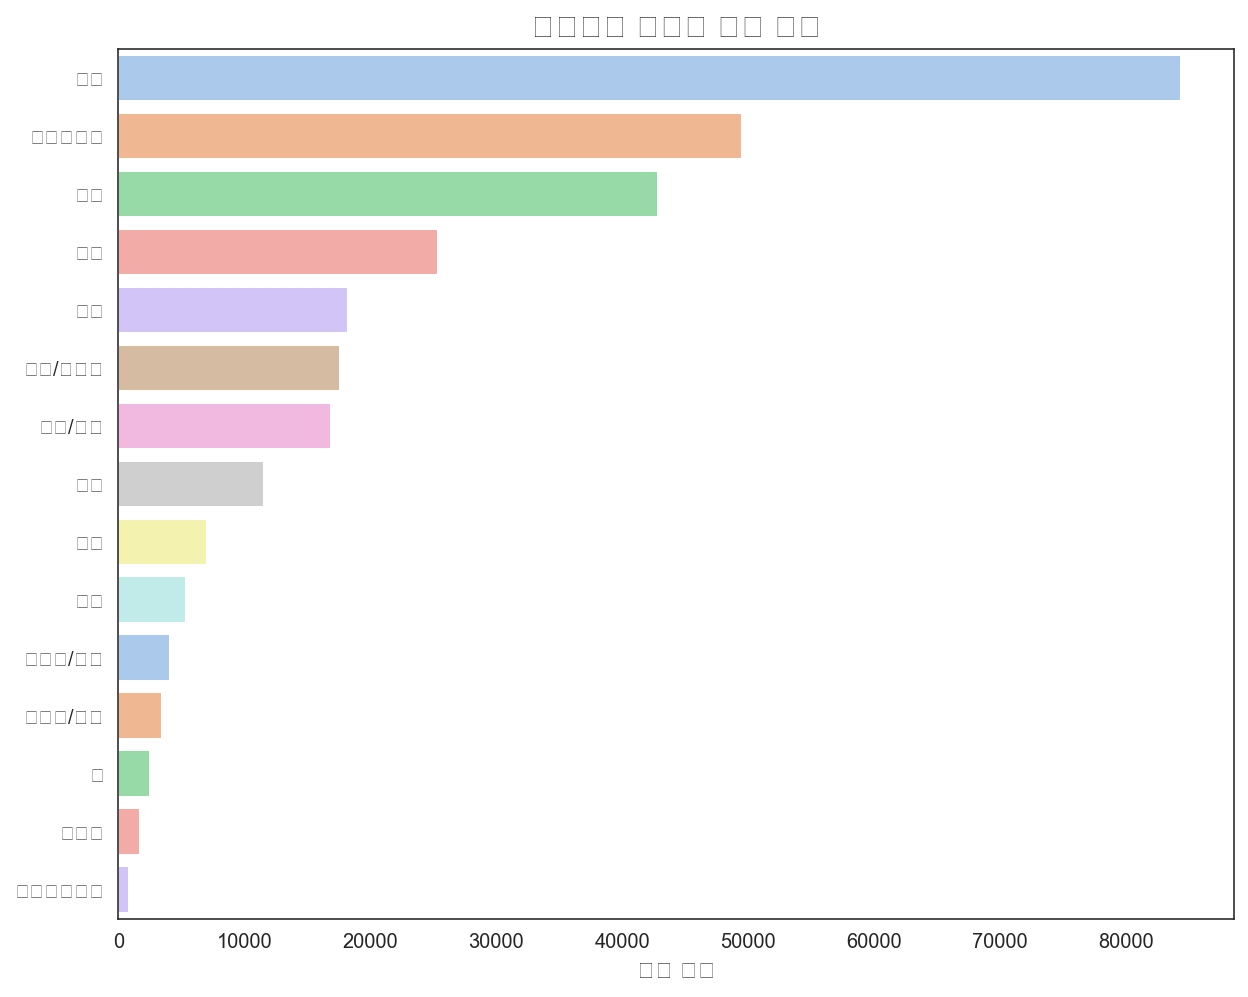

In [19]:
plt.figure(figsize = (10,8))
sns.barplot(x = guro['DLVR_STORE_INDUTY_NM'].value_counts().values, y = guro['DLVR_STORE_INDUTY_NM'].value_counts().index, palette = 'pastel')
plt.title('구로동의 업종별 배달 건수', size = 16)
plt.xlabel('배달 건수', size = 12)
plt.show()

## 배달 소요 시간 및 배달 거리

In [20]:
# math 라이브러리 호출
from math import sin, cos, sqrt, atan2 , radians

In [21]:
# 위도, 경도를 기반으로 거리를 구하는 함수
def calculateDistance(row):
    R = 6373.0
    pickup_lat = radians(row['DLVR_STORE_LAT'])
    pickup_long = radians(row['DLVR_STORE_LONG'])
    
    dropoff_lat = radians(row['DLVR_DSTN_LAT'])
    dropoff_long = radians(row['DLVR_DSTN_LONG'])
    
    dlon = dropoff_long - pickup_long
    dlat = dropoff_lat - pickup_lat
    
    a = sin(dlat / 2) ** 2 + cos(pickup_lat) * cos(dropoff_lat) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R  * c
    
    return distance

In [22]:
# 위에서 만든 함수로 거리를 구해줌
guro['delivery_distance'] = guro.apply(lambda row : calculateDistance(row), axis = 1)

In [23]:
pd.DataFrame(guro['delivery_distance'].describe())

,delivery_distance
count,242499.000000
mean,1.384546
std,0.942138
min,0.000000
25%,0.736224
50%,1.214400
75%,1.777409
max,8.732990


최대 배달 거리는 8.7km이고, 평균적으로 2km 내로 배달이 이뤄지는 것으로 보입니다.

In [24]:
# datetime으로 변환
guro['PROCESS_DT'] = pd.to_datetime(guro['PROCESS_DT'])
guro['DLVR_RCEPT_HOUR'] = pd.to_datetime(guro['DLVR_RCEPT_TIME'])
guro['DLVR_COMPT_HOUR'] = pd.to_datetime(guro['DLVR_COMPT_TIME'])

# 배달이 걸린 시간. 배달이 완료된 시간 - 배달을 접수한 시간
guro['DLVR_TOTAL_TIME'] = (guro['DLVR_COMPT_HOUR'] - guro['DLVR_RCEPT_HOUR']).astype('timedelta64[m]')

In [25]:
# 국내 최초 코로나-19 집단감염이 시작된 대구 신천지의 감염 날짜를 토대로 코로나 이전과 이후로 데이터를 나눠줌.
# 배달 시간이 최대 120분 이하인 데이터만 집계하도록 함.
before_covid = guro[(guro['PROCESS_DT'] < '2020-02-18') & (guro['DLVR_TOTAL_TIME'] <= 120) & (guro['DLVR_TOTAL_TIME'] > 0)]
after_covid = guro[(guro['PROCESS_DT'] > '2020-02-18') & (guro['DLVR_TOTAL_TIME'] <= 120) & (guro['DLVR_TOTAL_TIME'] > 0)]

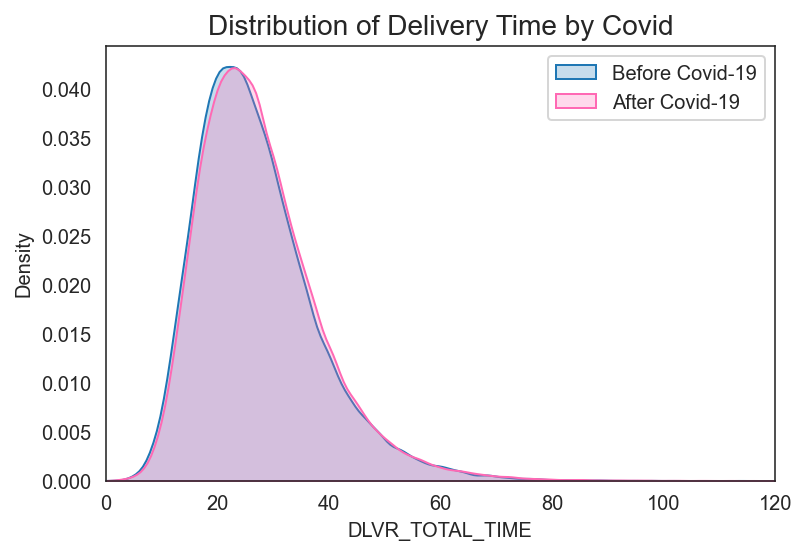

코로나-19 확산 이전의 평균 배달 소요시간 :  27.141
코로나-19 확산 이후의 평균 배달 소요시간 :  27.67


In [26]:
# 코로나 확산 이전과 이후의 배달 거리 차이 kde plot
sns.kdeplot(before_covid['DLVR_TOTAL_TIME'], fill = True, label = 'Before Covid-19')
sns.kdeplot(after_covid['DLVR_TOTAL_TIME'], fill = True, color = 'hotpink', label = 'After Covid-19')
plt.title('Distribution of Delivery Time by Covid', size = 14)
plt.legend()
plt.xlim(0, 120)
plt.show()

print('코로나-19 확산 이전의 평균 배달 소요시간 : ', round(before_covid['DLVR_TOTAL_TIME'].mean(), 3))
print('코로나-19 확산 이후의 평균 배달 소요시간 : ', round(after_covid['DLVR_TOTAL_TIME'].mean(), 3))

코로나-19 확산 이전과 이후의 평균 배달 소요시간은 큰 차이를 보이지 않았습니다.

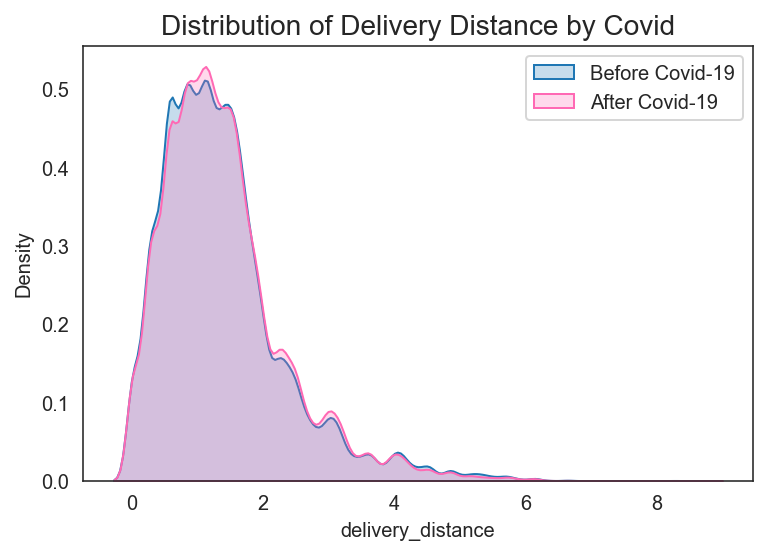

코로나 확산 이전의 평균 배달거리 :  1.38 km
코로나 확산 이후의 평균 배달거리 :  1.389 km


In [27]:
# 코로나 확산 이전과 이후의 배달 거리 차이 kde plot
sns.kdeplot(before_covid['delivery_distance'], fill = True, label = 'Before Covid-19')
sns.kdeplot(after_covid['delivery_distance'], fill = True, color = 'hotpink', label = 'After Covid-19')
plt.title('Distribution of Delivery Distance by Covid', size = 14)
plt.legend()
plt.show()

print('코로나 확산 이전의 평균 배달거리 : ', round(before_covid['delivery_distance'].mean(), 3),  'km')
print('코로나 확산 이후의 평균 배달거리 : ', round(after_covid['delivery_distance'].mean(), 3),  'km')

대부분 5km 이내의 지점에서 배달을 시켰으며, 코로나-19 확산 이후엔 평균 배달거리가 조금 증가하였지만 큰 차이는 보이지 않았습니다.

## 2. 구로구 상권분석

### Map 시각화

In [28]:
# 상점 Map 시각화하기
Map = pd.DataFrame(guro[['DLVR_STORE_ROAD', 'DLVR_STORE_LAT', 'DLVR_STORE_LONG', 'DLVR_STORE_LEGALDONG_NM']].value_counts()).reset_index()
Map['DLVR_STORE_ROAD'] = Map['DLVR_STORE_ROAD'].str.split(' ').str[2]
Map.rename(columns = {'DLVR_STORE_ROAD' : '도로명', 'DLVR_STORE_LAT' : '위도', 'DLVR_STORE_LONG' : '경도', 'DLVR_STORE_LEGALDONG_NM' : '동' ,0 : '배달 건수'}, inplace = True)
Map.head()

,도로명,위도,경도,동,배달 건수
0,경인로47길,37.502084,126.865063,고척동,33219
1,경인로40길,37.495564,126.859043,개봉동,16125
2,남부순환로97길,37.493919,126.858997,개봉동,15421
3,경인로31길,37.499715,126.850250,개봉동,13505
4,경인로,37.498489,126.860154,오류동,12221


In [29]:
# plotly로 시각화 해줌.
fig = px.scatter_mapbox(Map, lat="위도", lon="경도", hover_name="도로명", hover_data=["배달 건수"]
                        , zoom=12, height = 500,size= '배달 건수', color = '동', title = '구로구 가게들의 맵 시각화 ')
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(
        showlegend = True,
        geo = dict(
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()

많은 가게들이 등록 인구가 가장 많은 구로동이 아닌 고척동과 개봉동에 위치하고 있습니다. 이유는 구로동의 데이터가 많이 수집되지 않은 것으로 생각됩니다. 

매장에서 배달 플랫폼을 통해 고객의 주문을 접수하고, 고객에게 음식을 배달하기 위해선 라이더들의 도움을 받아야합니다. 하지만 배달 대행은 거리별로 돈을 받으므로 넓은 바운더리의 영업을 하게 된다면 수익률은 낮아질 수 밖에 없습니다. 그렇기에 배달 서비스를 제공하는 매장은 자신의 고객들이 어디에 많이 위치하고 있는가를 분석해볼 필요가 있습니다.

그럼 이 가게들의 고객은 어디에 위치하고 있을까요? 

In [30]:
# 목적지 Map 시각화하기
Map = pd.DataFrame(guro[['DLVR_DSTN_ROAD', 'DLVR_DSTN_LAT', 'DLVR_DSTN_LONG', 'DLVR_DSTN_SIGNGU_NM']].value_counts()).reset_index()
Map['DLVR_DSTN_ROAD'] = Map['DLVR_DSTN_ROAD'].str.split(' ').str[2]
Map.rename(columns = {'DLVR_DSTN_ROAD' : '도로명', 'DLVR_DSTN_LAT' : '위도', 'DLVR_DSTN_LONG' : '경도', 'DLVR_DSTN_SIGNGU_NM' : '구' ,0 : '배달 건수'}, inplace = True)
Map.head()

,도로명,위도,경도,구,배달 건수
0,경인로,37.498489,126.860154,구로구,18865
1,고척로,37.500651,126.847333,구로구,7454
2,경인로20가길,37.495840,126.845637,구로구,5654
3,천왕로,37.481183,126.838951,구로구,4675
4,개봉로20길,37.492838,126.858524,구로구,4609


In [31]:
# plotly로 시각화 해줌.
fig = px.scatter_mapbox(Map, lat="위도", lon="경도", hover_name="도로명", hover_data=["배달 건수"]
                        , zoom=12, height = 500,size= '배달 건수', color = '구', title = '구로구 가게들의 주요 고객 맵 시각화 ')
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(
        showlegend = True,
        geo = dict(
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()

대부분의 고객들은 구로구 내의 위치하고 잇으며, 고척동 인근과 오류동에서 주문량이 많다는 것을 확인 할 수 있었습니다. 또한 구로구의 인근 지역인 양천구, 광명시, 금천구, 영등포구, 관악구, 부천시, 동작구에 거주하는 고객들도 확인 할 수 있었습니다.

### 클러스터링

In [32]:
# 가게와 배달 목적이의 경도, 위도를 할당해줌
longitude = list(guro['DLVR_STORE_LONG']) + list(guro['DLVR_DSTN_LONG'])
latitude = list(guro['DLVR_STORE_LAT']) + list(guro['DLVR_DSTN_LAT'])

In [33]:
# 새로운 df를 생성
loc_df = pd.DataFrame()
loc_df['longitude'] = longitude
loc_df['latitude'] = latitude

# NaN을 삭제해줌.
loc_df.dropna(inplace = True)

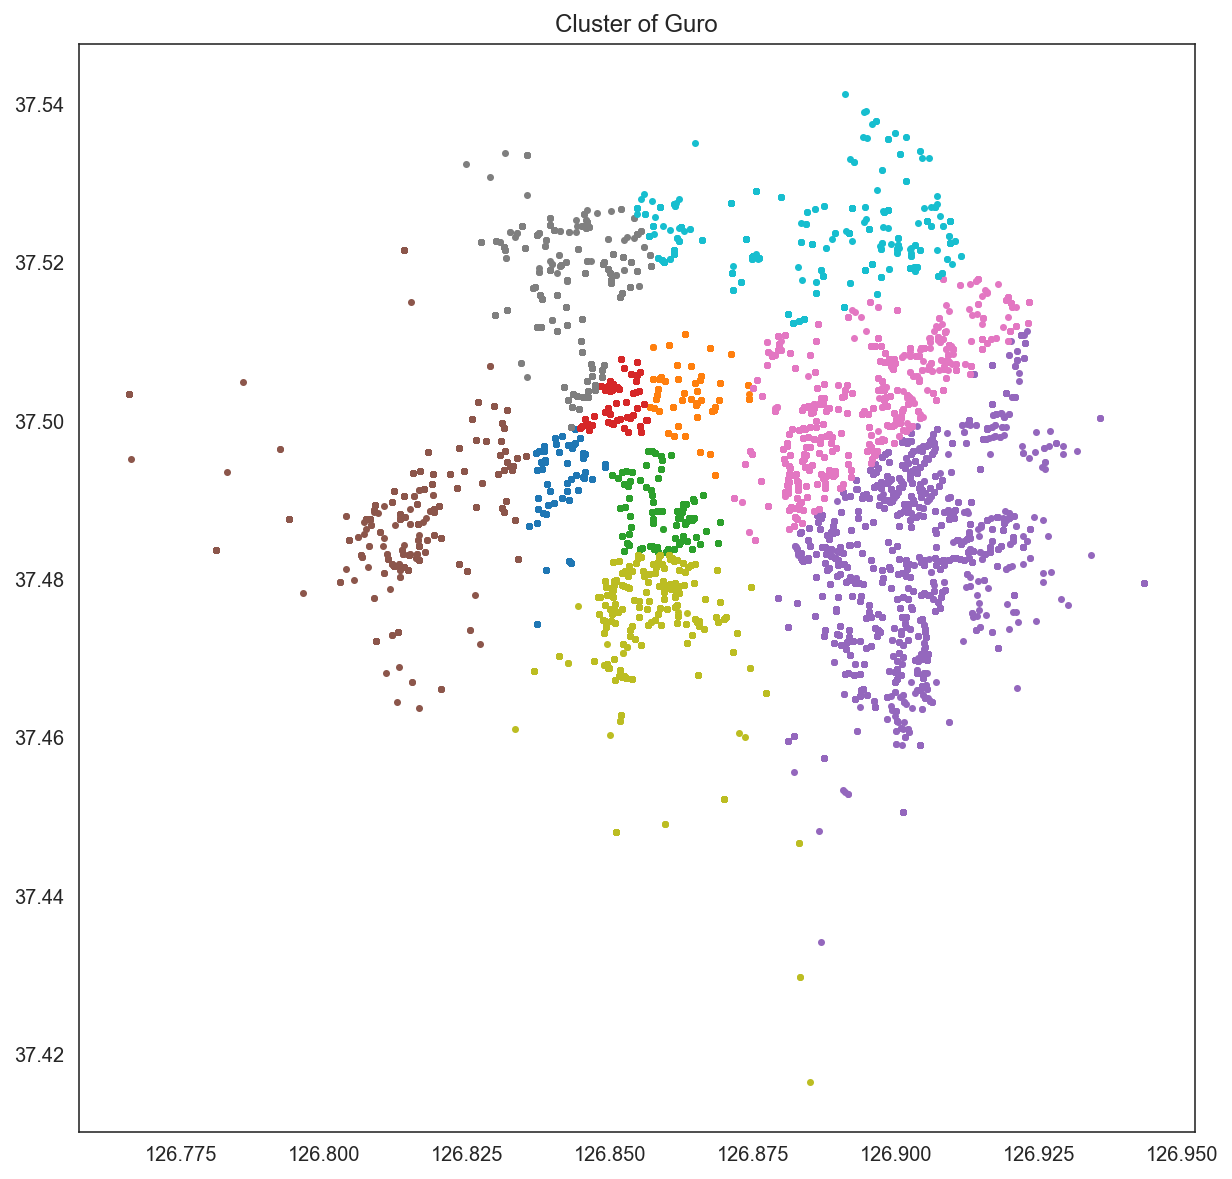

In [34]:
# Kmeans 객체를 생성
kmeans = KMeans(n_clusters = 10, random_state=2, n_init = 10).fit(loc_df)
loc_df['label'] = kmeans.labels_

# 위에서 생성한 Cluster를 시각화함
plt.figure(figsize = (10,10))
for label in loc_df['label'].unique():
    plt.plot(loc_df['longitude'][loc_df['label'] == label], loc_df['latitude'][loc_df['label'] == label], '.', markersize = 5)
    
plt.title('Cluster of Guro')
plt.show()

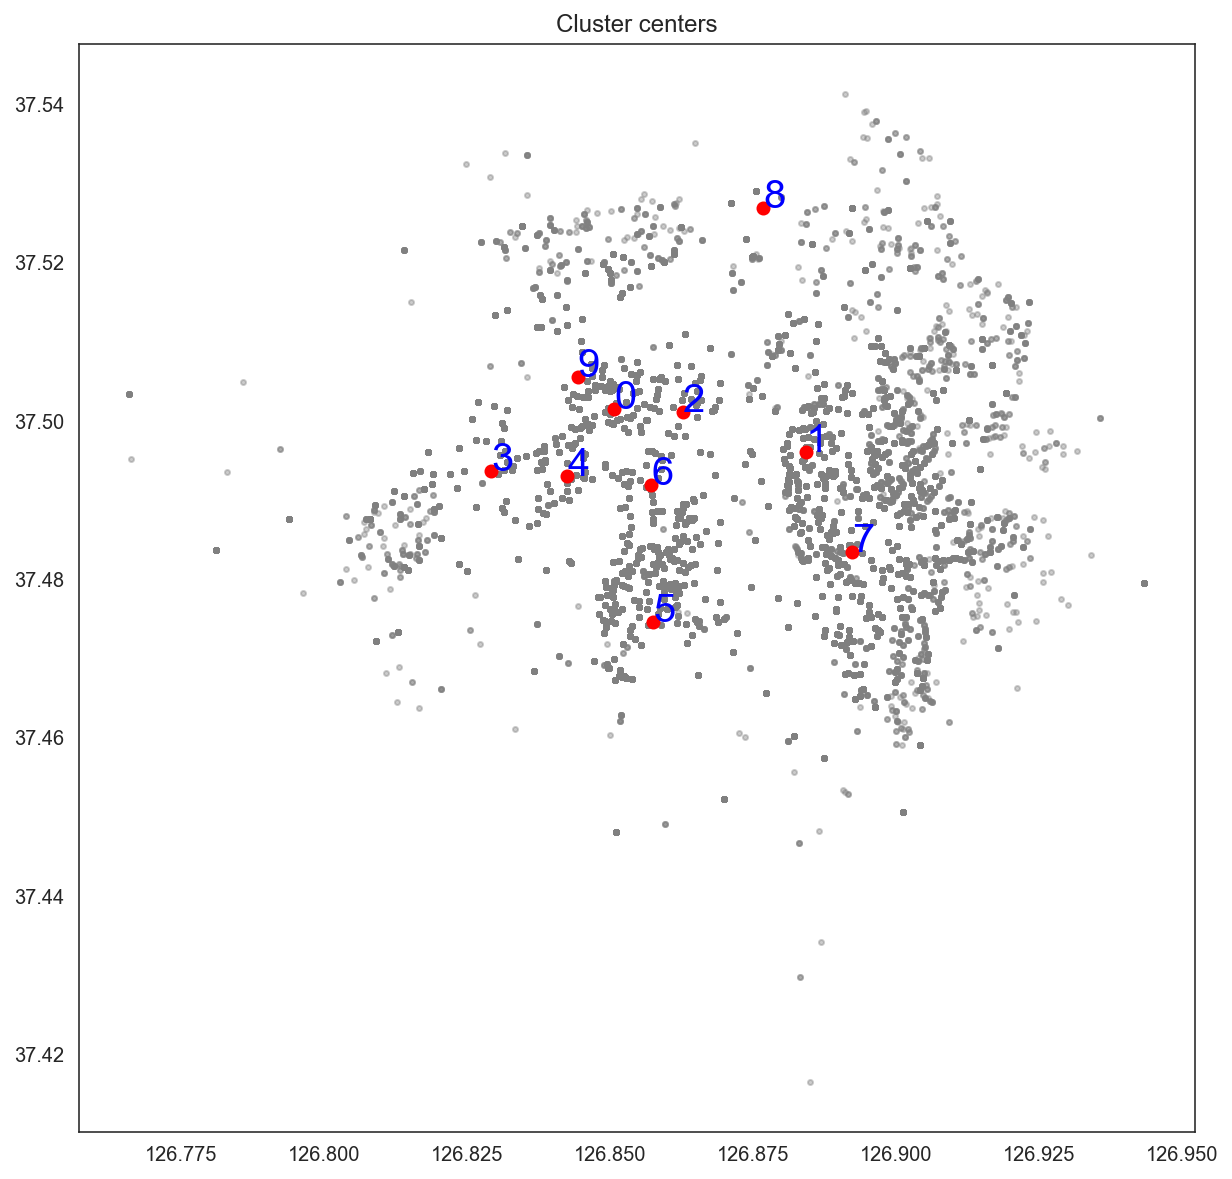

In [35]:
# Cluster의 중점을 표시함.
fig, ax = plt.subplots(figsize = (10,10))

for label in loc_df.label.unique():
    ax.plot(loc_df['longitude'][loc_df['label'] == label], loc_df['latitude'][loc_df['label'] == label], '.', alpha = 0.4, markersize = 5, color = 'gray')
    ax.plot(kmeans.cluster_centers_[label, 0], kmeans.cluster_centers_[label, 1], 'o', color = 'r')
    ax.annotate(label, (kmeans.cluster_centers_[label, 0], kmeans.cluster_centers_[label, 1]), color = 'b', fontsize = 20)
    
ax.set_title('Cluster centers')
plt.show()

In [36]:
# Kmeans 객체를 통해 예측함

guro = guro.dropna(subset = ['DLVR_STORE_ROAD', 'DLVR_DSTN_ROAD']).reset_index(drop = True)
guro['pickup_cluster'] = kmeans.predict(guro[['DLVR_STORE_LONG', 'DLVR_STORE_LAT']])
guro['dropoff_cluster'] = kmeans.predict(guro[['DLVR_DSTN_LONG', 'DLVR_DSTN_LAT']])

# 배달기사가 수령했을 때의 시간을 pickup_hour라고 새로운 변수를 생성해줌
guro['pickup_hour'] = guro['DLVR_RCEPT_TIME'].apply(lambda x : parser.parse(x).hour)

In [37]:
clusters = pd.DataFrame()
clusters['x'] = kmeans.cluster_centers_[:, 0] # 경도
clusters['y'] = kmeans.cluster_centers_[:, 1] # 위도
clusters['label'] = range(len(clusters))

df = guro

MovieWriter imagemagick unavailable; using Pillow instead.



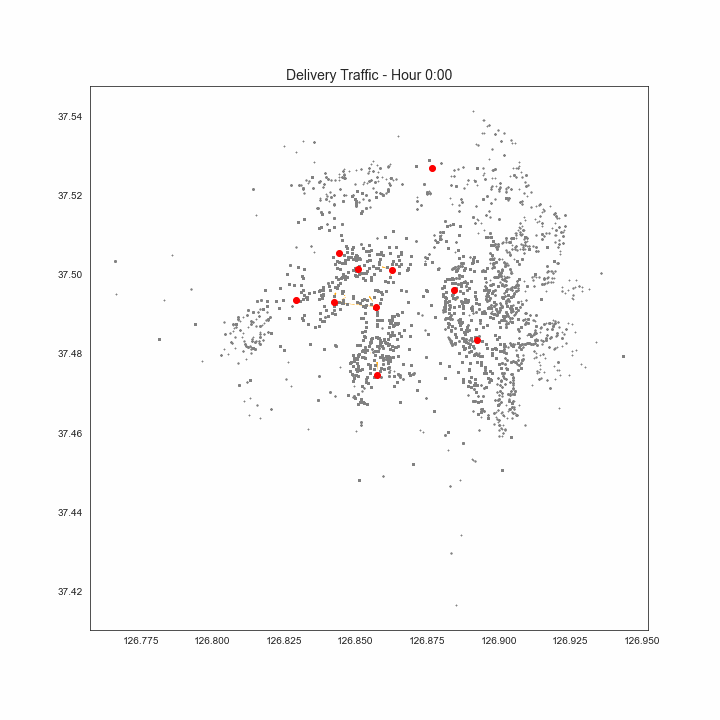

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [38]:
# 애니메이션 생성

fig, ax = plt.subplots(1, 1, figsize = (10,10))

def animate(hour):
    ax.clear()
    ax.set_title('Delivery Traffic - Hour ' + str(int(hour)) + ':00', size = 14)    
    plt.figure(figsize = (10,10));
    for label in loc_df.label.unique():
        ax.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 1, markersize = 2, color = 'gray');
        ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r');

    for label in clusters.label:
        for dest_label in clusters.label:
            num_of_rides = len(df[(df.pickup_cluster == label) & (df.dropoff_cluster == dest_label) & (df.pickup_hour == hour)])
            dist_x = clusters.x[clusters.label == label].values[0] - clusters.x[clusters.label == dest_label].values[0]
            dist_y = clusters.y[clusters.label == label].values[0] - clusters.y[clusters.label == dest_label].values[0]
            pct = np.true_divide(num_of_rides,len(df))
            arr = Arrow(clusters.x[clusters.label == label].values, clusters.y[clusters.label == label].values, -dist_x, -dist_y, edgecolor='white', width = 3 * pct)
            ax.add_patch(arr)
            arr.set_facecolor('orange')

ani = animation.FuncAnimation(fig,animate,sorted(df.pickup_hour.unique()), interval = 1000)
plt.close()
ani.save('animation.gif', writer='imagemagick', fps=2)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

시간대별로 각 클러스터에 해당되는 가게 -> 목적지로 가는 애니메이션을 만들어보았습니다. 이를 통해 시간대에 따라 한 클러스터에서 다른 클러스터로의 주문량을 쉽게 볼 수 있었습니다. 또한 저녁 시간대에 많은 주문이 이루어지는 것을 볼 수 있었습니다.

# 2.구로구 깃발 꽂기 추천

In [39]:
# 창폐업 데이터 불러오기
del_region = pd.read_csv('data/KT_빅데이터플랫폼_데이터셋/StartupOrClosing_Region_ver2.csv')

# 구로구만 보기
del_region = del_region[(del_region['SIGUNGU_NM'] == '구로구')]

# 업종 명칭 살펴보기
list(del_region[(del_region['SIGUNGU_NM'] == '구로구')]['INDUTY_NM'].unique())

# 구로구에 위치한 외식업체
del_region[(del_region['INDUTY_NM'] =='치킨' ) | (del_region['INDUTY_NM'] =='한식') | (del_region['INDUTY_NM'] =='카페') | (del_region['INDUTY_NM'] =='횟집')]

,INDEX,DATE,INDUTY_NM,BRTC_NM,SIGUNGU_NM,EMD,LA_DCMLPOINT_VALUE,LO_DCMLPOINT_VALUE,DIVISION
1253,1254,20200526,한식,서울,구로구,구로3동,37.483***,126.900***,0
4516,4517,20200529,한식,서울,구로구,구로5동,37.503***,126.890***,0
16660,16661,20200529,한식,서울,구로구,구로동,37.483***,126.900***,0
27022,27023,20200529,카페,서울,구로구,구로동,37.488***,126.890***,0
35048,35049,20200529,카페,서울,구로구,개봉동,37.491***,126.855***,0
40639,40640,20200529,한식,서울,구로구,신도림동,37.509***,126.887***,0
40723,40724,20200529,한식,서울,구로구,구로1동,37.492***,126.882***,0
44592,44593,20200529,카페,서울,구로구,개봉본동,37.496***,126.856***,0
55487,55488,20200602,횟집,서울,구로구,가리봉동,37.483***,126.891***,0
58354,58355,20200605,카페,서울,구로구,신도림동,37.509***,126.889***,0


구로구에 위치해있으면서 외식업을 하는 가게들을 찾아본 결과, 고척동에 안타깝게도 폐업을 했던 치킨 가게가 한 곳 있었습니다.  매장이 폐업을 하는 이유는 다양한 이유가 있겠지만 성공을 하는 이유는 단 하나입니다.  <b> 재주문율을 높다는 것입니다! </b> 저희는 음식의 퀄리티와 서비스를 높이는 것은 물론이고 자신의 고객들을 잘 이해하는 것도 중요하다고 생각했습니다. 

배달의 민족에서는 깃발 꽂기라는 기능이 있습니다.  월 8만 8천원을 내고 특정 지역에 노출도를 높여서 매출을 늘릴 수 있습니다. 하지만 많은 지역에 5~10개씩 꽂는다면 비용이 매우 부담스럽습니다. 만약 폐업을 하신 사장님께서도 자신들의 팬이 어디에 많이 있는지 분석하셨다면, 더 좋은 홍보 전략을 짜실 수 있으셨을 것이라 생각했습니다. 저희가 도움을 드릴 수 있는 고척동의 치킨집이 있는지 한 번 살펴볼까요?

### 동별 생활인구 히트맵

### 주변 경쟁업체 배달 건수 및 매출액 분석

In [40]:
# 고척동에 위치하고 치킨을 판매하는 주변 경쟁 업체
rival = guro[(guro['DLVR_STORE_LEGALDONG_NM'] == '고척동') & (guro['DLVR_STORE_INDUTY_NM'] == '치킨')]

# 평균 판매가와 총 수익, 배달 건수를 구하고, 상위 10개의 업체 선정
rival.groupby('DLVR_STORE_ID')['GOODS_AMOUNT'].agg(['mean', 'sum', 'count']).sort_values('count', ascending = False).head(10)

,mean,sum,count
DLVR_STORE_ID,,,
S0000192,22093.787425,29517300,1336
S0000113,21292.567493,15458404,726
S0000176,22473.977695,12091000,538
S0000251,25463.484487,10669200,419
S0000255,21163.235294,8634600,408
S0000172,21544.977654,7713102,358
S0000220,21952.727273,7244400,330
S0000218,18548.136646,5972500,322
S0000181,23381.144781,6944200,297


 대부분의 가게들이 2만원 초반의 판매가를 형성하고 있습니다. 'S0000192', 'S0000113', 'S0000176'가  고척동에서 주문율이 높은 상위 3개의 매장입니다. 심지어 매출 1위인 S000192 매장의 매출액은 2,3위의 매출액을 합한 것보다 더욱 많습니다. 만약 'S0000181' 매장이 깃발 꽂기를 통해 더욱 매출액을 높이고, 단골을 늘리려면 어느 위치에 깃발을 꽂아야 할까요?

In [41]:
S0000181 = guro.loc[guro['DLVR_STORE_ID'] == 'S0000181']

# 목적지 Map 시각화하기
Map = pd.DataFrame(S0000181[['DLVR_DSTN_ROAD', 'DLVR_DSTN_LAT', 'DLVR_DSTN_LONG', 'DLVR_DSTN_LEGALDONG_NM']].value_counts()).reset_index()
Map['DLVR_DSTN_ROAD'] = Map['DLVR_DSTN_ROAD'].str.split(' ').str[2]
Map.rename(columns = {'DLVR_DSTN_ROAD' : '도로명', 'DLVR_DSTN_LAT' : '위도', 'DLVR_DSTN_LONG' : '경도', 'DLVR_DSTN_LEGALDONG_NM' : '동' ,0 : '배달 건수'}, inplace = True)
Map.head()

,도로명,위도,경도,동,배달 건수
0,경인로,37.498489,126.860154,고척동,30
1,경인로,37.498489,126.860154,개봉동,21
2,목동남로4길,37.509229,126.867605,신정동,20
3,사성로,37.487052,126.863122,철산동,20
4,시청로,37.484503,126.865822,철산동,19


In [42]:
# plotly로 시각화 해줌.
fig = px.scatter_mapbox(Map, lat="위도", lon="경도", hover_name="도로명", hover_data=["배달 건수"]
                        , zoom=12.5, height = 500,size= '배달 건수', color = '도로명', title = 'S0000181의 주요 고객 맵 시각화 ')
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(
        showlegend = True,
        geo = dict(
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()

S0000181의 경우 크게 두, 세 곳으로 나눌 수 있을 것 같습니다. 첫번째로 경인로, 중앙로 1길, 중앙로 6길 부근입니다. 대부분의 고객들이 이 부근에 위치하고 있습니다. 다음으로는 광명시 부근의 사성로와 시청로 부근입니다. 또는 목동남로 4길 부근으로 깃발을 더 추가하여 공격적으로 홍보할 수도 있을 것 같습니다.